In [1]:
import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

In [2]:
def bar_charts_categorical(df, feature, target):
    cont_tab = pd.crosstab(df[feature], df[target], margins = True)
    categories = cont_tab.index[:-1]
        
    fig = plt.figure(figsize=(30, 5))
    
    plt.subplot(121)
    p1 = plt.bar(categories, cont_tab.iloc[:-1, 0].values, 0.55, color="gray")
    p2 = plt.bar(categories, cont_tab.iloc[:-1, 1].values, 0.55, bottom=cont_tab.iloc[:-1, 0], color="darkblue")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Frequency bar chart")
    plt.xlabel(feature)
    plt.xticks(rotation="vertical")
    plt.ylabel("$Frequency$")

    # auxiliary data for 122
    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values), 
                        np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])
      
    plt.subplot(122)
    p1 = plt.bar(categories, obs_pct[0], 0.55, color="gray")
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color="darkblue")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'),labelspacing =1)
    plt.title("Proportion bar chart")
    plt.xlabel(feature)
    plt.ylabel("$p$")
    plt.xticks(rotation="vertical")
    plt.show()
    

### Read File

In [4]:
data_original=pd.read_csv("C:/Users/Madal/Downloads/donors.csv")

C:\Users\Madal\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (9,412) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
#Create a copy
data = data_original.copy()

In [6]:
#drop the index "Unnamed"
data.drop(["Unnamed: 0"], axis=1, inplace= True)
# replace " " by nans
data.replace(" ", np.nan, inplace=True)

In [7]:
data.columns                              

Index(['ODATEDW', 'OSOURCE', 'TCODE', 'STATE', 'ZIP', 'MAILCODE', 'PVASTATE',
       'DOB', 'NOEXCH', 'RECINHSE',
       ...
       'AVGGIFT', 'CONTROLN', 'HPHONE_D', 'RFA_2R', 'RFA_2F', 'RFA_2A',
       'MDMAUD_R', 'MDMAUD_F', 'MDMAUD_A', 'GEOCODE2'],
      dtype='object', length=475)

In [8]:
data.dtypes.unique

<bound method Series.unique of ODATEDW     object
OSOURCE     object
TCODE        int64
STATE       object
ZIP         object
             ...  
RFA_2A      object
MDMAUD_R    object
MDMAUD_F    object
MDMAUD_A    object
GEOCODE2    object
Length: 475, dtype: object>

### Normalize Some Values and replacing empty String for Nans

In [9]:
Y_Values=["COLLECT1","VETERANS","BIBLE","CATLG","HOMEE","PETS","CDPLAY","STEREO","PCOWNERS","PHOTO","CRAFTS","FISHER","GARDENIN","BOATS","WALKER","KIDSTUFF","CARDS","PLATES"]
for i in Y_Values:
    data[i]=pd.Series(np.where(data[i].values == 'Y', 1, 0),data.index)
data[Y_Values]

,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
95408,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
95409,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
95410,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
X_values=["NOEXCH","RECINHSE","RECP3","RECPGVG","RECSWEEP","MAJOR","PEPSTRFL"]
for i in X_values:
    data[i]=pd.Series(np.where(data[i].values == 'X', 1, 0),data.index)
data[X_values]

,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MAJOR,PEPSTRFL
0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1
4,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...
95407,0,0,0,0,0,0,0
95408,0,0,0,0,0,0,0
95409,0,0,1,0,0,0,1
95410,0,1,0,0,0,0,1


In [11]:
data["MAILCODE"]=pd.Series(np.where(data["MAILCODE"].values == 'B', 1, 0),data.index)

In [12]:
# replace " " by nans
data.replace(" ", np.nan, inplace=True)

### Dropping Columns with High percentege of missing values

In [13]:
#if a columns has more than half of missing values the column is removed
for i in data:
    if  data[i].isna().sum()/data.shape[0] >0.51:
        data.drop(i,axis=1,inplace=True)
print(data_original.shape[1]-data.shape[1],"columns were removed")

75 columns were removed


In [14]:
df= data['LASTDATE'].str.split("-",expand=True)
data['YEAR'] = df[0]
data['MONTH'] = df[1]
data["YEAR"]=data["YEAR"].astype(int)
data['MONTH'] = data['MONTH'].astype(int)
data["LDYears"] = 2017- data["YEAR"]

In [15]:
data['LDMonths'] = data["MONTH"] - 1
cv = data[["LDYears",'LDMonths']]
cv1 = cv[cv.LDYears < 2 ]
cv1 = cv1[cv1.LDYears > 0 ]
lapsedDonors = cv1[cv1.LDMonths < 12]

In [16]:
data['Lapsed Donor'] = np.where(data.index.isin(lapsedDonors.index), 'LD', 'NLD')

In [17]:
df= data['DOB'].str.split("-",expand=True)
data['YEARob'] = df[0]

In [18]:
data[data['YEARob'].isnull()]
data['YEARob'] = pd.to_numeric(data['YEARob'], errors='coerce')
data = data.dropna(subset=['YEARob'])
data['YEARob'] = data['YEARob'].astype(int)

In [19]:
data["AGE"] = 2017- data["YEARob"]

In [20]:
data["GENDER"].replace({' ':'U', 'C':'U','A':'U'}, inplace=True)

### Visualization

### Pairwise Relationship of Numerical Variables

#### Socio - Economic Variables

In [ ]:
#Não sei se a WEALTH e o INCOME deviam estar aqui

In [21]:
socio_economic = data[["WEALTH1","IC4","HHAS1","HHAS2","HHAS3","HHAS4","INCOME","HV2","HV4"]].copy()

In [22]:
socio_economic_features = socio_economic.select_dtypes(include=["int16","int32","float64","int64"]).columns.to_list()

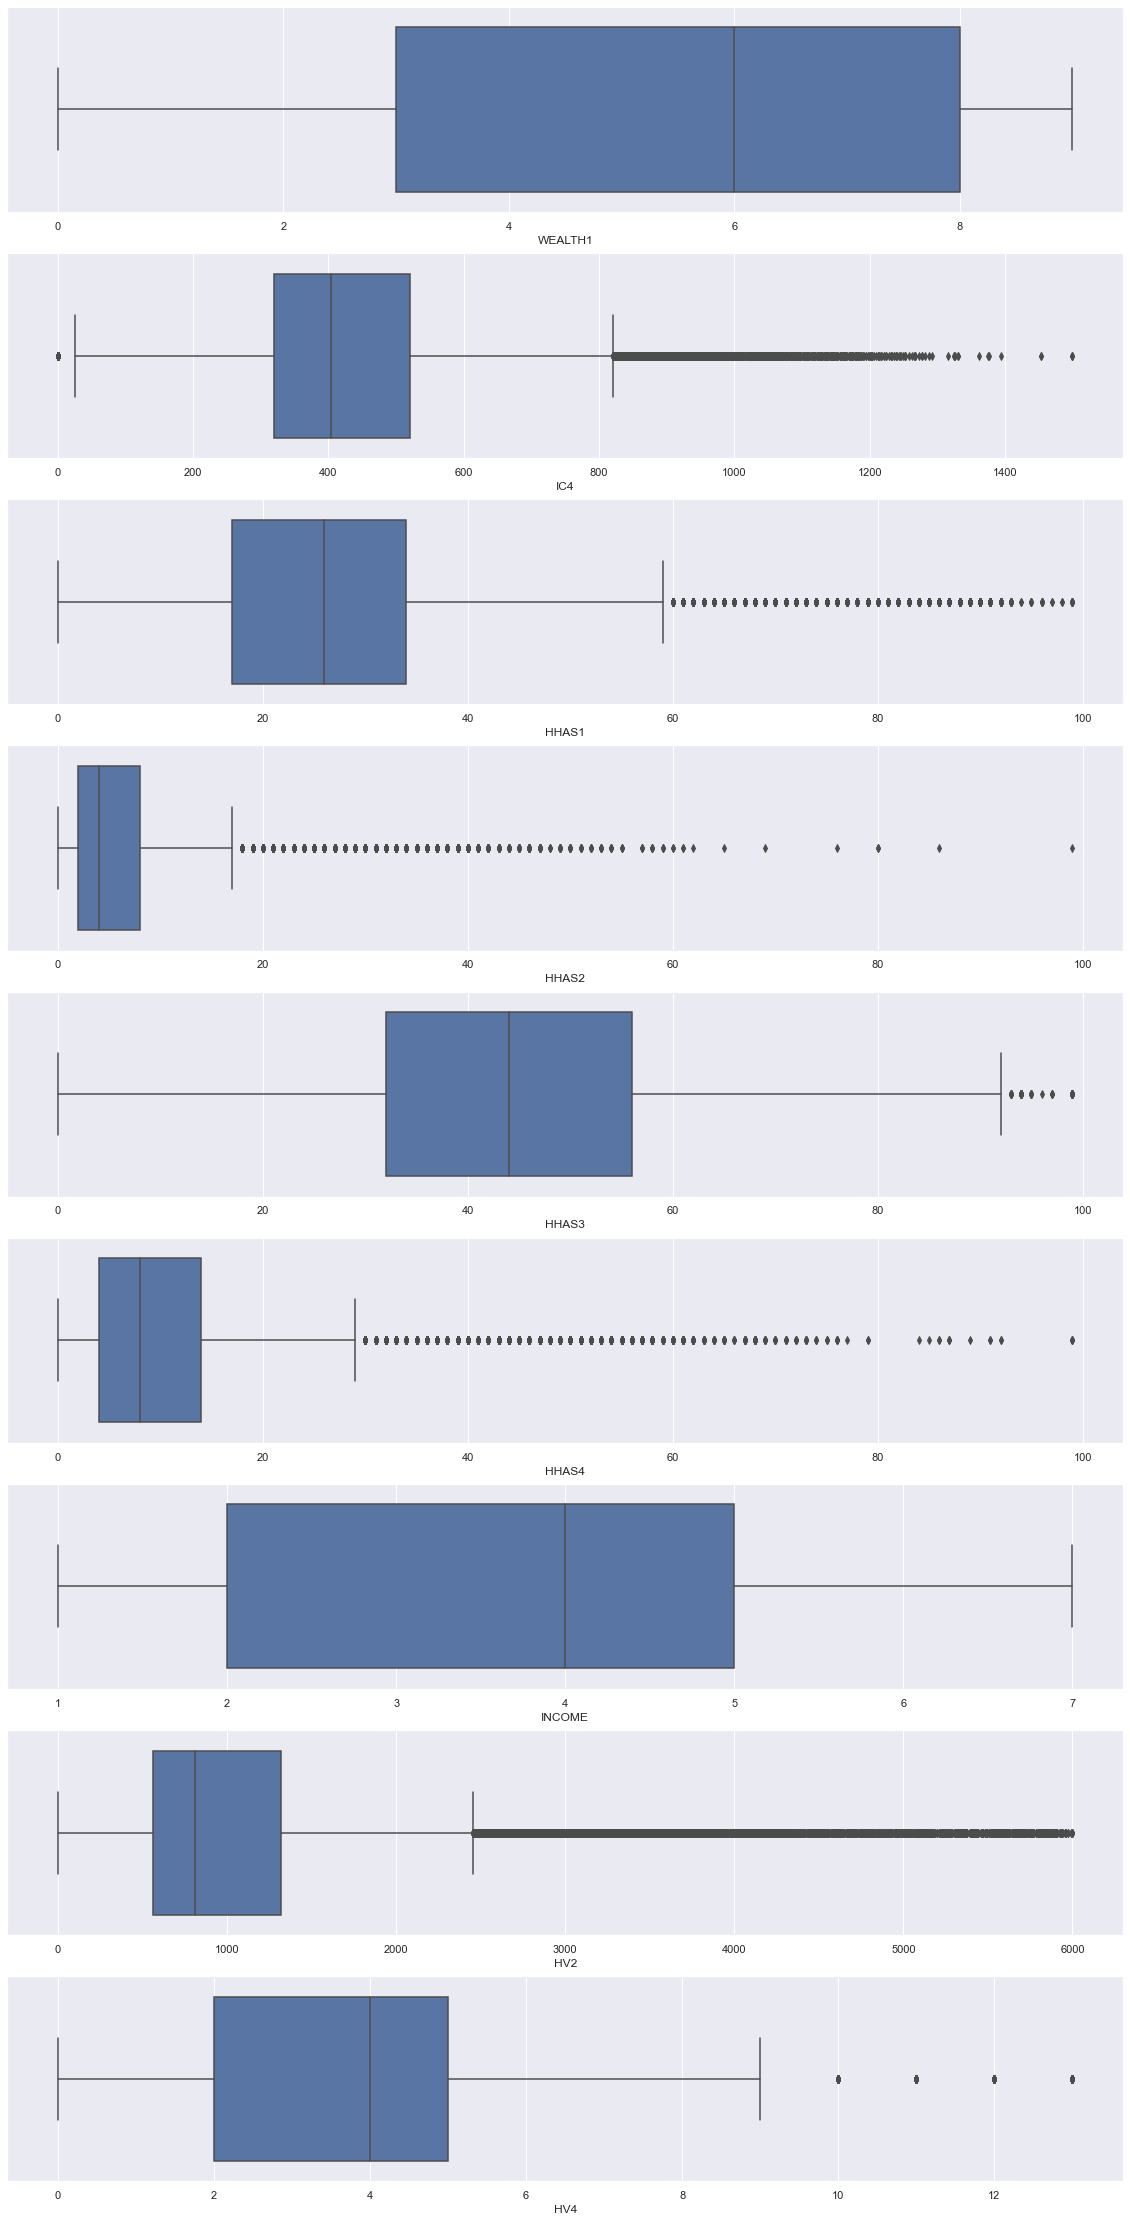

In [23]:
sns.set()
fig, axes = plt.subplots(len(socio_economic_features), ceil(len(socio_economic_features) / len(socio_economic_features)), figsize=(20, 40))
for ax, feat in zip(axes.flatten(), socio_economic_features):
    sns.boxplot(x=data[feat], ax=ax) 
plt.show()

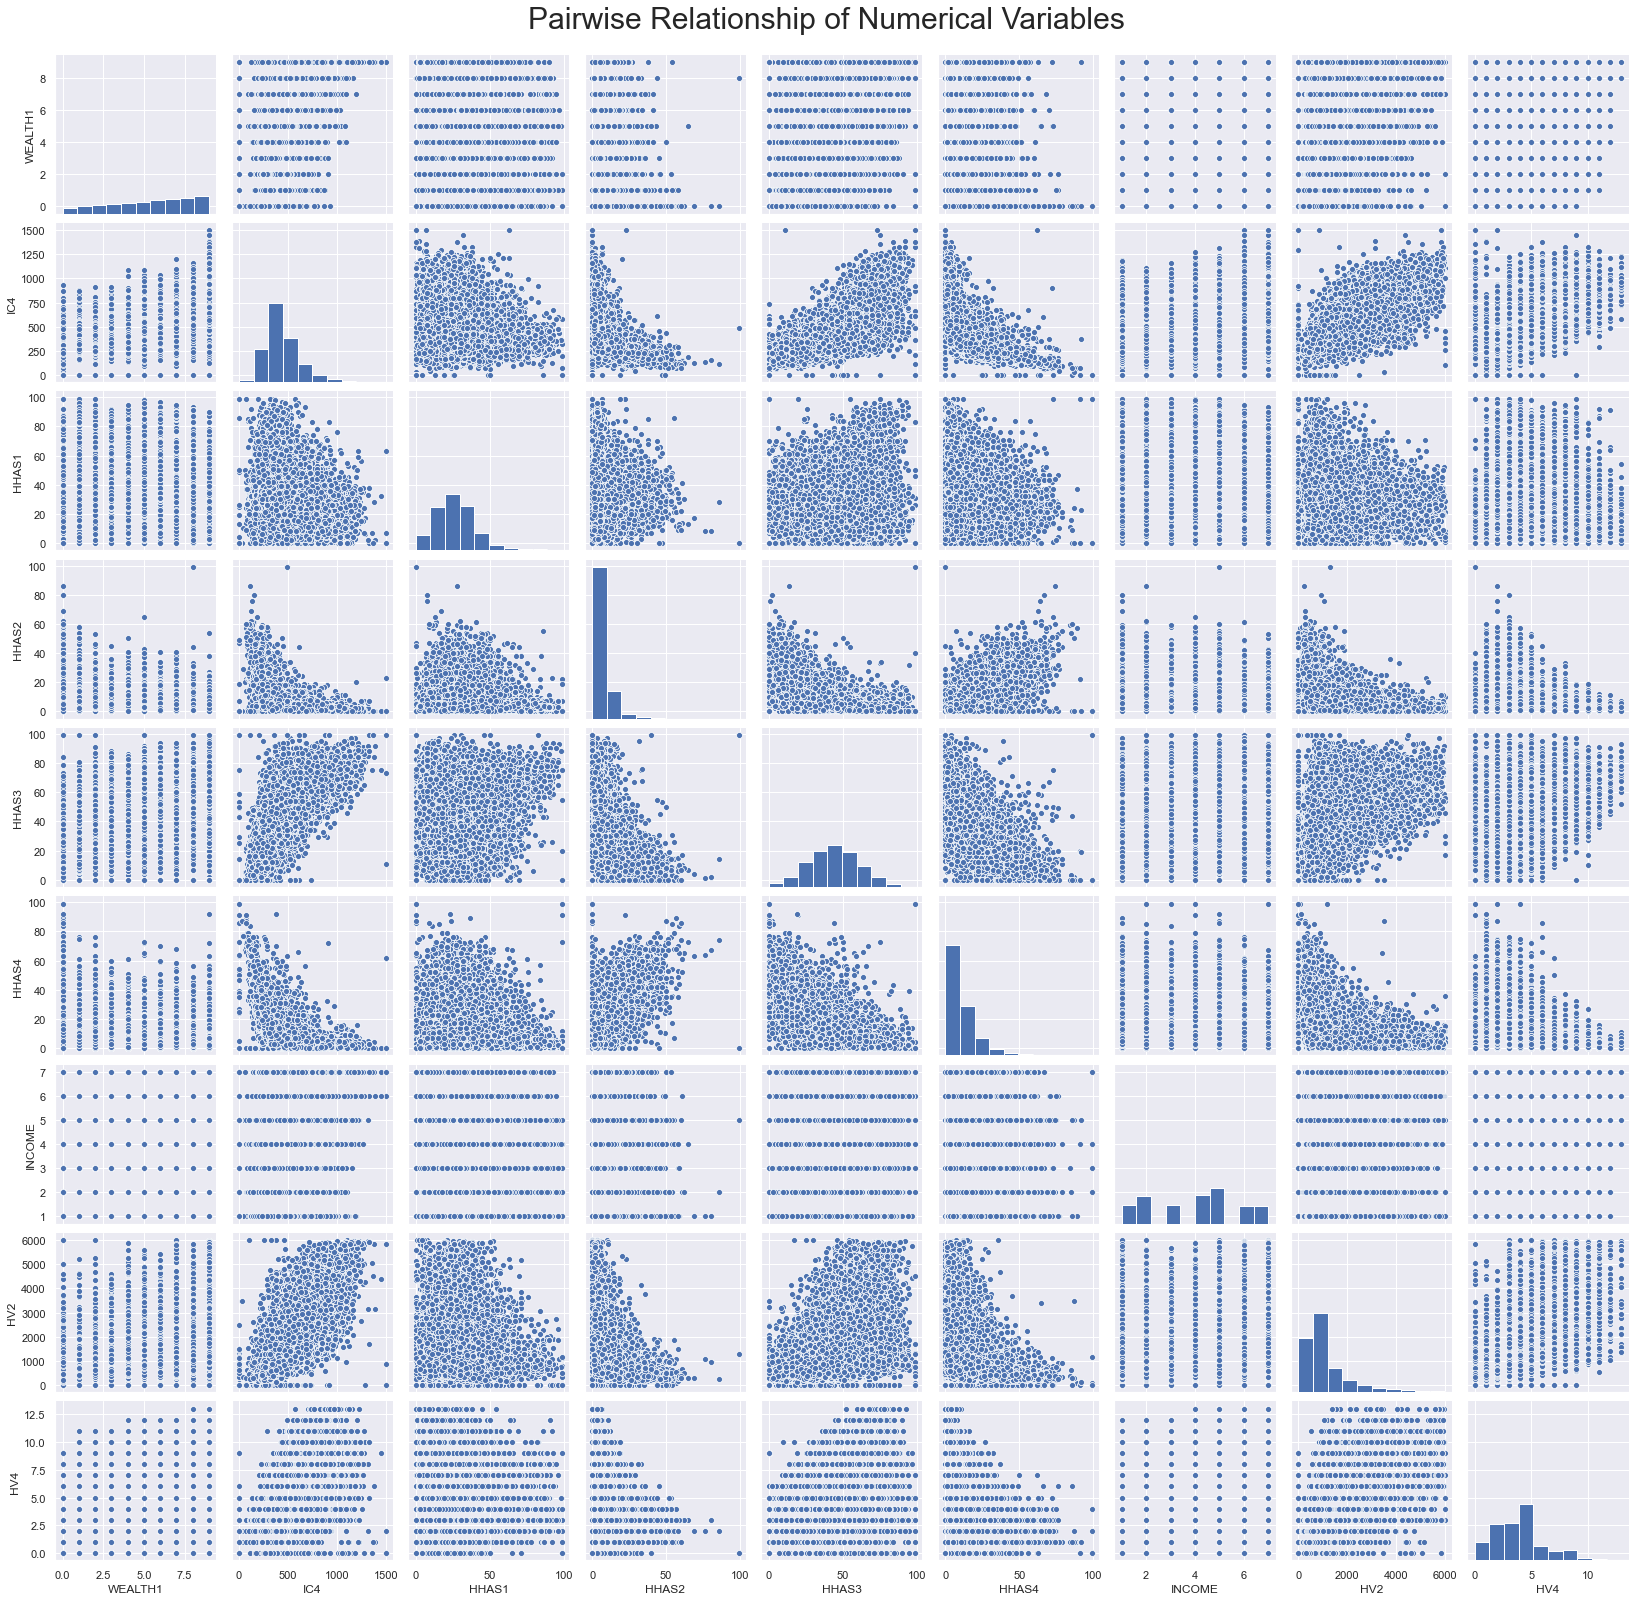

In [24]:
sns.set()
sns.pairplot(data[socio_economic_features], diag_kind="hist")
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=30)
plt.show()

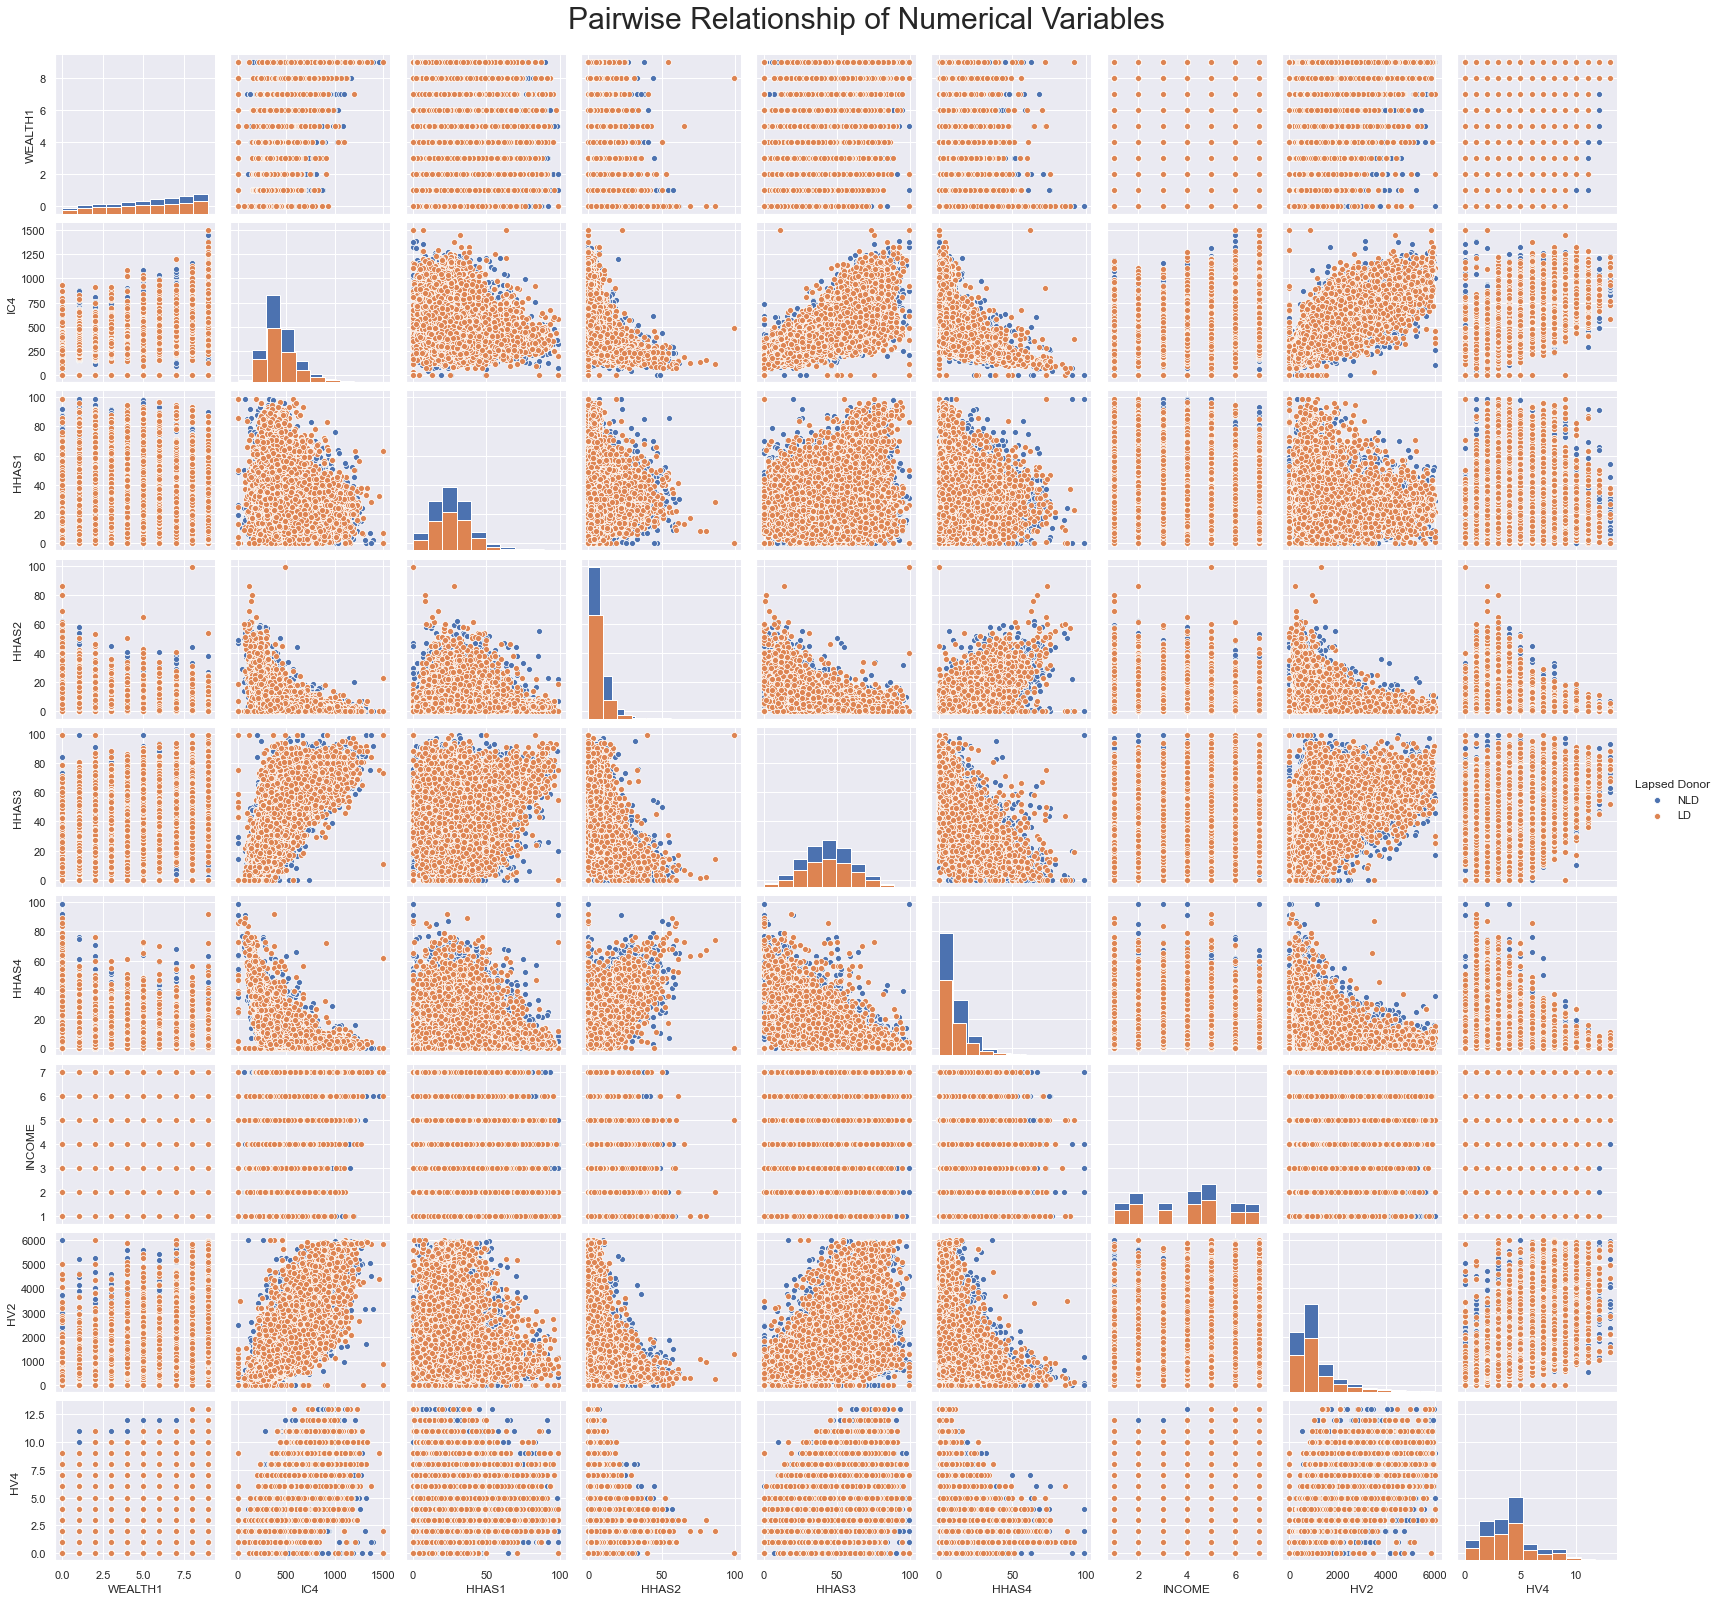

In [25]:
sns.set()
sns.pairplot(data[socio_economic_features + ["Lapsed Donor"]], diag_kind="hist", hue = "Lapsed Donor")
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=30)
plt.show()